<img src="https://admissions.ntust.edu.tw/front_index/images/logo.png" alt="drawing" width="600"/>
<hr>
<h1><center>MACHINE LEARNING : HOMEWORK 1</center></h1>
<h1><center>Data 1 : Wealth prediction</center></h1>
<h4>Hector LANDES - M10601810</h4>
<h4>Machine Learning - CS5087701</h4>

<hr>
<div id="Import the libraries">
    <h2>Import the libraries</h2>
</div>

In [87]:
#!conda install -c conda-forge pydotplus -y
#pip install graphviz
#pip install pydotplus
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pydotplus as py
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.metrics import confusion_matrix
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Hector Landes\graphviz-2.38\release\bin'
%matplotlib inline 

<hr>
<div id="Import the data">
    <h2>Import the data</h2>
</div>

In [315]:
data = pd.read_csv (r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\adult.csv', 
                    names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "wealth"],
                   index_col=False)

<hr>
<div id="Data checking">
    <h3>Data checking</h3>
</div>

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null int8
fnlwgt            30162 non-null int8
education         30162 non-null int8
education-num     30162 non-null int64
marital-status    30162 non-null int8
occupation        30162 non-null int8
relationship      30162 non-null int8
race              30162 non-null int8
sex               30162 non-null int8
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null int8
wealth            30162 non-null object
dtypes: int64(5), int8(9), object(1)
memory usage: 1.9+ MB


In [317]:
len(data)

32561

In [318]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wealth
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<hr>
<div id="Data preprocessing">
    <h2>Data preprocessing</h2>
</div>

<h3>ID3</h3> (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

<h3>C4.5</h3> is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

<h3>C5.0</h3> is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

<h3>CART</h3> (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.

<h3>Drop missing values rows</h3>

In [337]:
data.isin([' ?', '? ', '?', "NaN"]).any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
wealth            False
dtype: bool

In [320]:
data = data[(data.astype(str) != ' ?').all(axis=1)]

In [321]:
len(data)

30162

Because, CART does not support categorical variables, I will create dummies for each categorical variables.
Let's start with: 
<ul>
<b> X </b> as the <b> Feature Matrix </b> 
</ul>

In [322]:
data[["workclass"]] = data["workclass"].astype('category')
data["workclass"] = data["workclass"].cat.codes

data[["education"]] = data["education"].astype('category')
data["education"] = data["education"].cat.codes

data[["marital-status"]] = data["marital-status"].astype('category')
data["marital-status"] = data["marital-status"].cat.codes

data[["occupation"]] = data["occupation"].astype('category')
data["occupation"] = data["occupation"].cat.codes

data[["relationship"]] = data["relationship"].astype('category')
data["relationship"] = data["relationship"].cat.codes

data[["race"]] = data["race"].astype('category')
data["race"] = data["race"].cat.codes

data[["sex"]] = data["sex"].astype('category')
data["sex"] = data["sex"].cat.codes

data[["native-country"]] = data["native-country"].astype('category')
data["native-country"] = data["native-country"].cat.codes

bins = pd.cut(data['fnlwgt'], 20)
bins = bins.cat.codes
data[data.columns[2]] = bins

In [323]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wealth
0,39,5,0,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,0,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,2,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,3,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,4,9,13,2,9,5,2,0,0,0,40,4,<=50K
5,37,2,3,12,14,2,3,5,4,0,0,0,40,38,<=50K
6,49,2,1,6,5,3,7,1,2,0,0,0,16,22,<=50K
7,52,4,2,11,9,2,3,0,4,1,0,0,45,38,>50K
8,31,2,0,12,14,4,9,1,4,0,14084,0,50,38,>50K
9,42,2,1,9,13,2,3,0,4,1,5178,0,40,38,>50K


In [324]:
X = data[data.columns[:14]].values
X[0:5]

array([[  39,    5,    0,    9,   13,    4,    0,    1,    4,    1, 2174,
           0,   40,   38],
       [  50,    4,    0,    9,   13,    2,    3,    0,    4,    1,    0,
           0,   13,   38],
       [  38,    2,    2,   11,    9,    0,    5,    1,    4,    1,    0,
           0,   40,   38],
       [  53,    2,    3,    1,    7,    2,    5,    0,    2,    1,    0,
           0,   40,   38],
       [  28,    2,    4,    9,   13,    2,    9,    5,    2,    0,    0,
           0,   40,    4]], dtype=int64)

In [325]:
X = data[data.columns[:14]]

<ul>
    <li> <b> Y </b> as the <b> Target Value </b> </li>
</ul>

In [326]:
Y = data["wealth"]
Y[0:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: wealth, dtype: object

Now we will split the data in training and testing data

In [327]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [328]:
print('Feature matrix ->   Training:',X_trainset.shape,'   Testing:',X_testset.shape)
print('Target value   ->   Training:',Y_trainset.shape,'      Testing:',Y_testset.shape)

Feature matrix ->   Training: (21113, 14)    Testing: (9049, 14)
Target value   ->   Training: (21113,)       Testing: (9049,)


<hr>
<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>richTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [329]:
richTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_samples_leaf = 100)
richTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> Y_trainset </b>

In [330]:
richTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [331]:
predTree = richTree.predict(X_testset)

In [332]:
print (predTree [0:5])
print (Y_testset [0:5])

[' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K']
10872     <=50K
10984     <=50K
3475       >50K
10871     <=50K
32048     <=50K
Name: wealth, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
</div>

In [333]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.8403138468339043


<h3>Cross-validation for different tree depth</h3>

In [310]:
for max_depth in range(1, 20):
    richTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(richTree, X_trainset, Y_trainset, cv=5)
    print("Max depth: %d, Accuracy: %0.5f (+/- %0.5f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.75356 (+/- 0.00017)
Max depth: 2, Accuracy: 0.81580 (+/- 0.02273)
Max depth: 3, Accuracy: 0.83451 (+/- 0.00859)
Max depth: 4, Accuracy: 0.84015 (+/- 0.00692)
Max depth: 5, Accuracy: 0.84190 (+/- 0.00808)
Max depth: 6, Accuracy: 0.84555 (+/- 0.00697)
Max depth: 7, Accuracy: 0.84801 (+/- 0.00624)
Max depth: 8, Accuracy: 0.84616 (+/- 0.00733)
Max depth: 9, Accuracy: 0.84734 (+/- 0.00798)
Max depth: 10, Accuracy: 0.84521 (+/- 0.00757)
Max depth: 11, Accuracy: 0.84408 (+/- 0.01228)
Max depth: 12, Accuracy: 0.84152 (+/- 0.01352)
Max depth: 13, Accuracy: 0.84109 (+/- 0.00946)
Max depth: 14, Accuracy: 0.84100 (+/- 0.00840)
Max depth: 15, Accuracy: 0.83669 (+/- 0.00876)
Max depth: 16, Accuracy: 0.83446 (+/- 0.01010)
Max depth: 17, Accuracy: 0.83276 (+/- 0.01248)
Max depth: 18, Accuracy: 0.82982 (+/- 0.01135)
Max depth: 19, Accuracy: 0.82712 (+/- 0.00999)


<h3>Cross-validation for different train data quantity</h3>

In [311]:
for test_size in np.arange(0, 1, 0.05):
    X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=test_size, random_state=3)
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(richTree, X_trainset, Y_trainset, cv=5)
    print("Test size: %d percents, Accuracy: %0.5f (+/- %0.5f)" % (test_size*100, scores.mean(), scores.std()*2))

Test size: 0 percents, Accuracy: 0.83151 (+/- 0.00689)
Test size: 5 percents, Accuracy: 0.82878 (+/- 0.00597)
Test size: 10 percents, Accuracy: 0.82888 (+/- 0.00853)
Test size: 15 percents, Accuracy: 0.83067 (+/- 0.00701)
Test size: 20 percents, Accuracy: 0.82846 (+/- 0.01437)
Test size: 25 percents, Accuracy: 0.82392 (+/- 0.01268)
Test size: 30 percents, Accuracy: 0.82693 (+/- 0.00766)
Test size: 35 percents, Accuracy: 0.82209 (+/- 0.00888)
Test size: 40 percents, Accuracy: 0.82108 (+/- 0.00619)
Test size: 45 percents, Accuracy: 0.82332 (+/- 0.01949)
Test size: 50 percents, Accuracy: 0.81851 (+/- 0.01609)
Test size: 55 percents, Accuracy: 0.81432 (+/- 0.01254)
Test size: 60 percents, Accuracy: 0.81242 (+/- 0.01168)
Test size: 65 percents, Accuracy: 0.81319 (+/- 0.00853)
Test size: 70 percents, Accuracy: 0.81454 (+/- 0.01392)
Test size: 75 percents, Accuracy: 0.80849 (+/- 0.01683)
Test size: 80 percents, Accuracy: 0.80504 (+/- 0.01564)
Test size: 85 percents, Accuracy: 0.81366 (+/- 0.0

<h3>Confusion Matrix</h3>

In [334]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.95 0.05]
 [0.47 0.53]]


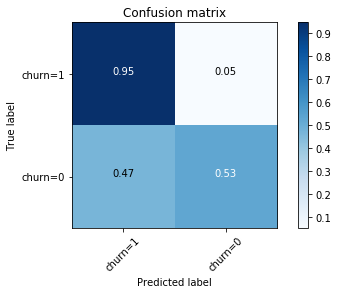

In [335]:
cnf_matrix = confusion_matrix(Y_testset, predTree)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= True,  title='Confusion matrix')

<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

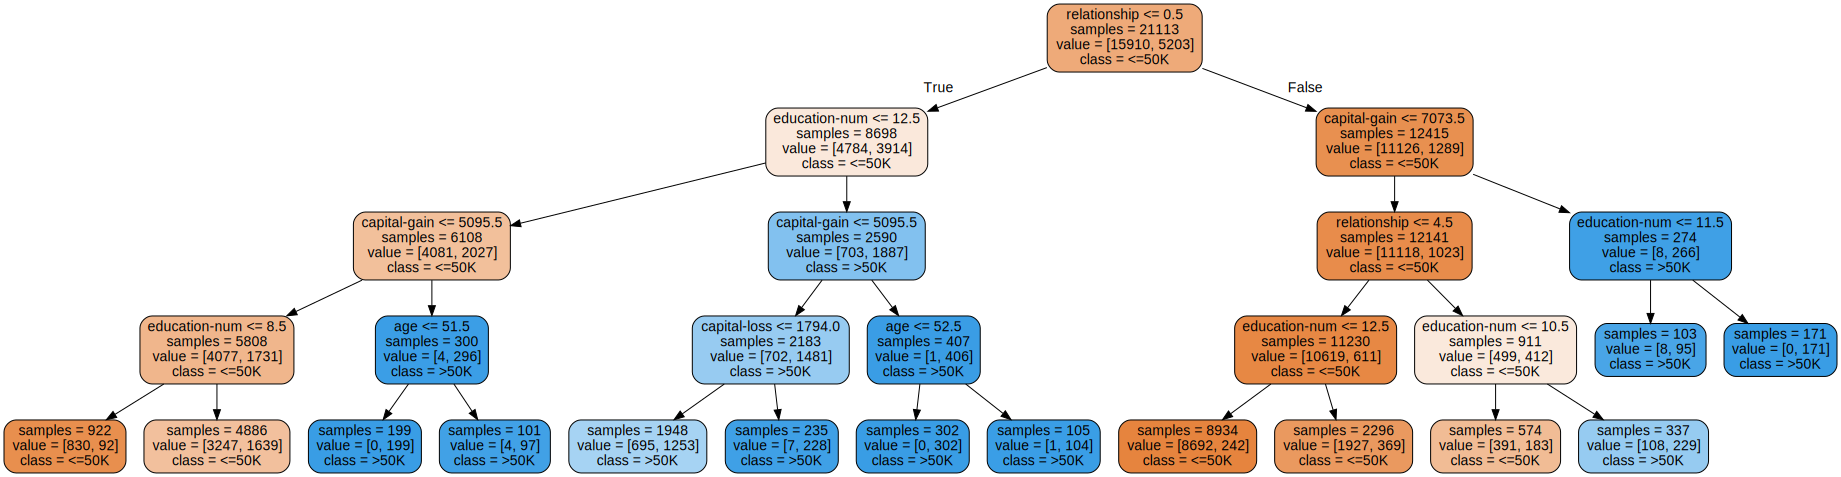

In [339]:
dot_data = tree.export_graphviz(richTree, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(X_trainset), class_names=['<=50K', '>50K'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

<h1><center>Source</center></h1> 
<li>https://itnext.io/learning-data-science-predict-adult-income-with-decision-tree-ae8dd57a76cc</li>
<li>https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html</li>
<li>https://arxiv.org/ftp/arxiv/papers/1810/1810.10076.pdf</li>
<li></li>
<li></li>
<li></li>

<h1>(pre-pruning, post-pruning strategies, etc.) and for different datasets.

(e) (Bonus) Can you suggest any approach for re-building the tree or revising
the tree so that the prediction result is better? (hint: manually selecting some
particular attributes, transforming the attributes from categorical ones to
numerical ones or the other way around.)</h1>

In [340]:
git remote add origin https://github.com/yongmingw/Homework.git
git push -u origin master

SyntaxError: invalid syntax (<ipython-input-340-f88a6ecd8fa8>, line 1)